In [1]:
import numpy as pn
import pandas as ps
%matplotlib inline
import matplotlib.pyplot as mt
import os
import tensorflow as tf
from tensorflow import keras

AxesImage(size=(28, 28))


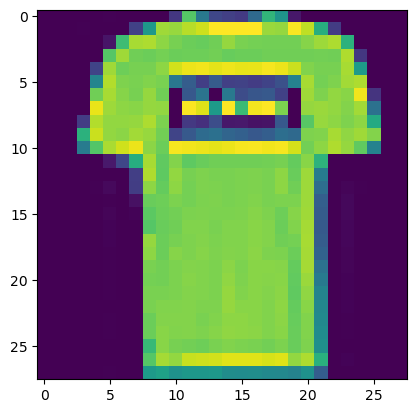

In [6]:
print(mt.imshow(X_train_full[1]))

AxesImage(size=(28, 28))


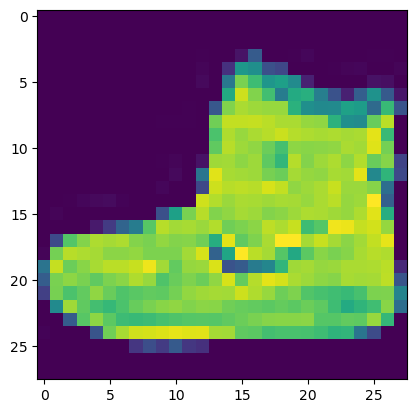

In [7]:
print(mt.imshow(X_train_full[0]))

In [23]:
import random

random.seed(10)
print(random.random())

0.5714025946899135


In [3]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data Reshape

In [8]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Data Normalization

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

## Splitting the Data Into train/individual/test

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture

In [11]:
pn.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
model_history = model.fit(X_train, y_train, epochs=10,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 13s 14ms/step - loss: 0.8481 - accuracy: 0.7060 - val_loss: 0.7761 - val_accuracy: 0.7232
Epoch 2/10
860/860 [==============================] - 12s 14ms/step - loss: 0.5283 - accuracy: 0.8080 - val_loss: 0.4703 - val_accuracy: 0.8282
Epoch 3/10
860/860 [==============================] - 12s 14ms/step - loss: 0.4738 - accuracy: 0.8290 - val_loss: 0.8459 - val_accuracy: 0.7046
Epoch 4/10
860/860 [==============================] - 12s 14ms/step - loss: 0.4376 - accuracy: 0.8436 - val_loss: 0.4033 - val_accuracy: 0.8610
Epoch 5/10
860/860 [==============================] - 13s 15ms/step - loss: 0.4151 - accuracy: 0.8510 - val_loss: 0.4059 - val_accuracy: 0.8556
Epoch 6/10
860/860 [==============================] - 13s 15ms/step - loss: 0.3915 - accuracy: 0.8602 - val_loss: 0.3663 - val_accuracy: 0.8756
Epoch 7/10
860/860 [==============================] - 14s 16ms/step - loss: 0.3746 - accuracy: 0.8662 - val_loss: 0.4067 - val_accuracy:

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.79      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.88      0.51      0.64      1000
           5       0.96      0.96      0.96      1000
           6       0.54      0.75      0.63      1000
           7       0.96      0.85      0.90      1000
           8       0.96      0.96      0.96      1000
           9       0.88      0.98      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



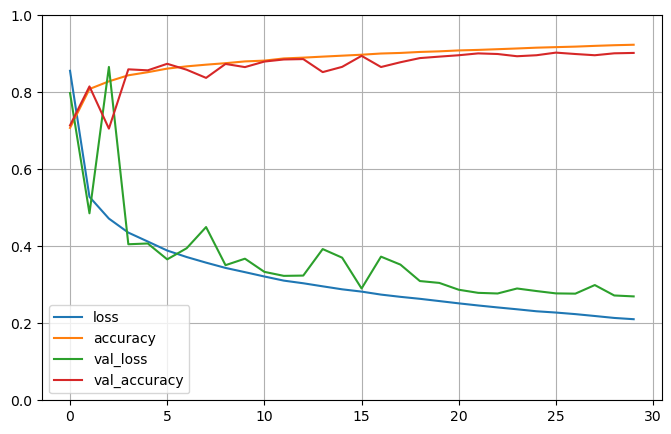

In [26]:
ps.DataFrame(model_history.history).plot(figsize=(8, 5))
mt.grid(True)
mt.gca().set_ylim(0, 1)
mt.show()

In [27]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.9010


In [28]:
ev

[0.2812522053718567, 0.9010000228881836]

In [29]:
X_new = X_test[:3]

In [32]:
y_pred = pn.argmax(model.predict(X_new),axis=1)
y_pred

1/1 [==============================] - 0s 94ms/step


array([9, 2, 1], dtype=int64)

In [33]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [34]:
keras.backend.clear_session

<function keras.backend.clear_session()>

## Pooling vs Non Pooling

In [35]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [37]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               6489900   
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [39]:
model_history_a = model_a.fit(X_train, y_train, epochs=5,batch_size= 64,
                    validation_data=(X_valid, y_valid))


Epoch 1/3
860/860 [==============================] - 13s 15ms/step - loss: 0.8712 - accuracy: 0.7026 - val_loss: 0.6898 - val_accuracy: 0.7560
Epoch 2/3
860/860 [==============================] - 12s 15ms/step - loss: 0.5260 - accuracy: 0.8096 - val_loss: 0.4851 - val_accuracy: 0.8244
Epoch 3/3
860/860 [==============================] - 12s 14ms/step - loss: 0.4725 - accuracy: 0.8284 - val_loss: 0.9269 - val_accuracy: 0.6938


In [42]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 24s 28ms/step - loss: 0.3231 - accuracy: 0.8818 - val_loss: 0.3702 - val_accuracy: 0.8606
Epoch 2/3
860/860 [==============================] - 24s 28ms/step - loss: 0.3131 - accuracy: 0.8856 - val_loss: 0.3371 - val_accuracy: 0.8768
Epoch 3/3
860/860 [==============================] - 25s 29ms/step - loss: 0.3033 - accuracy: 0.8889 - val_loss: 0.5501 - val_accuracy: 0.8006
